In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/train.csv')

In [3]:
df

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911
...,...,...,...,...,...,...
26293,26293,2018-12-31,Sweden,KaggleMart,Kaggle Hat,823
26294,26294,2018-12-31,Sweden,KaggleMart,Kaggle Sticker,250
26295,26295,2018-12-31,Sweden,KaggleRama,Kaggle Mug,1004
26296,26296,2018-12-31,Sweden,KaggleRama,Kaggle Hat,1441


In [4]:
km_df = df[df['store']=='KaggleMart']
kr_df = df[df['store']=='KaggleRama']

In [5]:
kr_df

,row_id,date,country,store,product,num_sold
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911
5,5,2015-01-01,Finland,KaggleRama,Kaggle Sticker,283
9,9,2015-01-01,Norway,KaggleRama,Kaggle Mug,1005
10,10,2015-01-01,Norway,KaggleRama,Kaggle Hat,1461
...,...,...,...,...,...,...
26290,26290,2018-12-31,Norway,KaggleRama,Kaggle Hat,2128
26291,26291,2018-12-31,Norway,KaggleRama,Kaggle Sticker,561
26295,26295,2018-12-31,Sweden,KaggleRama,Kaggle Mug,1004
26296,26296,2018-12-31,Sweden,KaggleRama,Kaggle Hat,1441


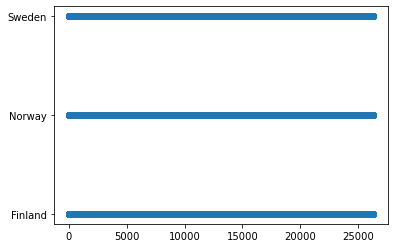

In [6]:
plt.scatter(km_df['row_id'], km_df['country'])

In [7]:
km_df[km_df['country']=='Sweden'].count()

row_id      4383
date        4383
country     4383
store       4383
product     4383
num_sold    4383
dtype: int64

In [8]:
km_df.describe()

,row_id,num_sold
count,13149.000000,13149.000000
mean,13147.000000,282.558978
std,7591.867227,172.236005
min,0.000000,70.000000
25%,6572.000000,148.000000
50%,13147.000000,238.000000
75%,19722.000000,376.000000
max,26294.000000,1809.000000


In [9]:
unique = km_df["product"].unique()
unique

array(['Kaggle Mug', 'Kaggle Hat', 'Kaggle Sticker'], dtype=object)

In [10]:
unique2= kr_df['product'].unique()
unique2

array(['Kaggle Mug', 'Kaggle Hat', 'Kaggle Sticker'], dtype=object)

In [41]:
import os
import csv
product_train_data = os.path.join("Data", "train.csv")


product_list = []
country_list = []
store_list = []

with open(product_train_data) as csvfile:

    csvreader = csv.reader(csvfile, delimiter=',')
    #Read the header row first
    csv_header = next(csvreader)
    total_sales = 0
    product_sales = 0
    country_sales = 0
    store_sales = 0
    number_sold = 0

    import collections
    sales = collections.Counter()

#Python script analyzes the sales and calculates each of the following:

#  The total number of sales
#Count # of rows (skipping first line)
    for row in csvreader:
        country_name = (row[2])
        store_name = (row[3])
        product_name = (row[4])
        number_sold = (row[5])
        country_name = (row[2])
        store_name = (row[3])
        product_name = (row[4])
        number_sold = (row[5])
        total_sales +=1


        if product_name not in product_list:
            product_list.append(product_name)

        if country_name not in country_list:
            country_list.append(country_name)
            
        if store_name not in store_list:
            store_list.append(store_name)
            
        sales[country_name]+=number_sold(row)
        sales[product_name]+=1
        sales[store_name]+=1


TypeError: 'str' object is not callable

In [42]:
number_sold

'329'

In [12]:
product_list

['Kaggle Mug', 'Kaggle Hat', 'Kaggle Sticker']

In [13]:
store_list

['KaggleMart', 'KaggleRama']

In [14]:
country_list

['Finland', 'Norway', 'Sweden']

In [15]:
#sales_df=pd.dataframe{product_list, total_sales}


sales_data={
            'Country': country_list,
            'Product': product_list,
            'Store': store_list,
            'Sales': total_sales,
                }

#sales_dict[f'{c}']=sales_data    
    
country_df=pd.DataFrame(sales_data["Country"])
product_df=pd.DataFrame(sales_data['Product'])
store_df=pd.DataFrame(sales_data['Store'])
sales_df=pd.DataFrame(country_df,product_df,store_df)


In [16]:
sales_data

{'Country': ['Finland', 'Norway', 'Sweden'],
 'Product': ['Kaggle Mug', 'Kaggle Hat', 'Kaggle Sticker'],
 'Store': ['KaggleMart', 'KaggleRama'],
 'Sales': 26298}

In [17]:
country_df

,0
0,Finland
1,Norway
2,Sweden


In [18]:
sales_df

,"(KaggleMart,)","(KaggleRama,)"
"(Kaggle Mug,)",NaN,NaN
"(Kaggle Hat,)",NaN,NaN
"(Kaggle Sticker,)",NaN,NaN
